# Step by step guide to accesspr (Version 4.5.0)

Before starting, make sure of the following

1. Get familiar with the [Swain lab plate reader software/class](http://swainlab.bio.ed.ac.uk/software/platereader/platereader.html).

2. To get the best out of accesspr, I highly recommend getting familiar with [pandas dataframes](http://pandas.pydata.org/pandas-docs/version/0.18.1/tutorials.html#tutorial-modern) and about the [seaborn visualization package](http://stanford.edu/~mwaskom/software/seaborn/index.html) .

3. [Install the seaborn package](http://stanford.edu/~mwaskom/software/seaborn/installing.html)

3. Process all plate reader experiments you need (pr instances), save each in individual pickle files, and store all those pickle (.pkl) files inside an empty folder. do this with a line similar to

'import pickle

pickle.dump(p20160704, open('path/p20160704.pkl', 'wb'))'


For this demo, a  folder with some example pickle files has been included in this distribution of accesspr. 

## About the data ##

This dataset was generated to characterise the expression dynamics of hexose transporter Hxt4 in Saccharomyces cerevisiae at different glucose levels.
The transporter was c-terminally tagged with yEGFP in a wild type strain as well in strains with deletions of glucose sensor Rgt2 and repressor Std1.
Cells were grown to stationary phase and put into fresh media with different amounts of glucose.

We aim to compile the results from several experiments. In a  total of 6 experiments, each of which has:

~12 blank (media) wells
3 concentrations X 7 technical replicates X 4 strains--->

* 229.WT- the untagged wild type

* 409.Hxt4- the tagged wild type

* 403.Hxt4std1- the std1 deletion

* 506.Hxt4rgt2- the rgt2 deletion

X 2 biological replicates at least.

As you can see, this dataset is quite complex, and it is not immediately obvious how to approach the data. the complexities include:

* all the data is in the form of time series
* the sampling times of different experiments vary, making it hard to merge biological replicates.

Additionally, you know the contents, but you don't know exactly **what condition is found where**. this makes analysis extremely tedious, especially for repetitive tasks.

plus, these experiments were made by a human and everything that implies.

We start by moving to the folder where accesspr is. then we import pandas, numpy and seaborn and accesspr


In [2]:
cd /Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/platereader 

/Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/platereader


In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as pch
import accesspr as ac
import scipy.interpolate as scint
%matplotlib inline


## Create an accesspr object with all your data
Now we create our first accesspr object by providing the folder with all our experiment pickle files.






In [4]:
pickleFileFolder='/Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/accesspr/accesspr_demo'
xpr=ac.accesspr(pickleFileFolder, FL='GFP', FLperod='c-GFPperod')
print(xpr.statContents)

trying to open  p20160629.pkl
trying to open  p20160630.pkl
trying to open  p20160701.pkl
trying to open  p20160702.pkl
trying to open  p20160703.pkl
trying to open  p20160704.pkl

 Adding GFP as a consensus. Please correct autofluorescence using this channel.
aligning experiment  p20160702.pkl
aligning experiment  p20160701.pkl
aligning experiment  p20160704.pkl
aligning experiment  p20160630.pkl
aligning experiment  p20160703.pkl
aligning experiment  p20160629.pkl
Experiments aligned successfully.
              FLperod gr  GFP  c-GFPperod
p20160702.pkl     NaN  1  1.0         1.0
p20160701.pkl     NaN  1  1.0         1.0
p20160704.pkl     NaN  1  1.0         1.0
p20160630.pkl     NaN  1  1.0         1.0
p20160703.pkl     NaN  1  1.0         1.0
p20160629.pkl     NaN  1  1.0         1.0


It tells us that it is trying to open files. 

It will also informed whether it was able to align the experiments successfully. More about this last bit later.



Now, to know everything we can do with accesspr, we do...

In [5]:
help(xpr)


Help on accesspr in module accesspr object:

class accesspr(builtins.object)
 |  accesspr version 4.5.0 (the number matches with that of the compatible platereader software version)
 |  
 |  accesspr is a class that allows to integrate and organize the information
 |  from many plate reader experiments to produce publication-grade plots and tables. 
 |  To fully understand the functionality of accesspr, it is ideal
 |  to learn about pandas (especially dataframes) and the seaborn graphics package. 
 |  
 |  ***Newest FEATURES***
 |  default fluorescence channels to be used can now be specified with arguments FL and FLperod.
 |  New method called assignFL creates an xpr.FL dictionary, which specifies the main fluorescence channel for each experiment.
 |  You can manually change the contents if some experiments were monitored at different gains, channels, etc.
 |  Attributes:
 |  xpr.experimentDuration. the duration (in hrs) of all experiments
 |  xpr.timeStat(), xpr.timeStatAligned() an

We will quickly screen the contents of the experiments.First we list the contents:

In [7]:
xpr.listcontents()




Experiment (p20160702.pkl) contains:
------------------ 

Medium (Glu 1.5%): 
229.WT,
403.Hxt4std1,
409.Hxt4,
506.Hxt4rgt2,
null,

Medium (Glu 0.4%): 
229.WT,
403.Hxt4std1,
409.Hxt4,
506.Hxt4rgt2,
null,

Medium (Glu 1%): 
229.WT,
403.Hxt4std1,
409.Hxt4,
506.Hxt4rgt2,
null,


Experiment (p20160701.pkl) contains:
------------------ 

Medium (Glu 1.5%): 
229.WT,
403.Hxt4std1,
409.Hxt4,
506.Hxt4rgt2,
null,

Medium (Glu 0.4%): 
229.WT,
403.Hxt4std1,
409.Hxt4,
506.Hxt4rgt2,
null,

Medium (Glu 1%): 
229.WT,
403.Hxt4std1,
409.Hxt4,
506.Hxt4rgt2,
null,


Experiment (p20160704.pkl) contains:
------------------ 

Medium (Glu 0.8%): 
229.WT,
403.Hxt4std1,
409.Hxt4,
506.Hxt4rgt2,
null,

Medium (Glu 0.6%): 
229.WT,
403.Hxt4std1,
409.Hxt4,
506.Hxt4rgt2,
null,

Medium (Glu 1%): 
229.WT,
403.Hxt4std1,
409.Hxt4,
506.Hxt4rgt2,
null,


Experiment (p20160630.pkl) contains:
------------------ 

Medium (Glu 0.2%): 
229.WT,
403.Hxt4std1,
409.Hxt4,
506.Hxt4rgt2,
null,

Medium (Glu 1%): 
229.WT,
403.Hxt4std1,

If you notice, the p20160212.pkl experiment does not have strains with the names or strains we expected, other than hxt4. 
As we are not interested in these strains for now, We can also provide the the ignoreFiles argument, a list with the names of files to ignore. 

In [8]:
xpr=ac.accesspr(pickleFileFolder, ignoreFiles=['p20160212.pkl'], FL='GFP', FLperod='c-GFPperod')
#xpr.correctauto(f=['GFP', 'AutoFL'], refstrain=['229.WT'])
#xpr.correctauto(f=['GFP', 'AutoFL'], refstrain=['229.WT'])
#xpr.data['p20160629.pkl'].correctauto(f=['GFP', 'AutoFL'], refstrain='229.WT')
xpr.statContents


trying to open  p20160629.pkl
trying to open  p20160630.pkl
trying to open  p20160701.pkl
trying to open  p20160702.pkl
trying to open  p20160703.pkl
trying to open  p20160704.pkl

 Adding GFP as a consensus. Please correct autofluorescence using this channel.
aligning experiment  p20160702.pkl
aligning experiment  p20160701.pkl
aligning experiment  p20160704.pkl
aligning experiment  p20160630.pkl
aligning experiment  p20160703.pkl
aligning experiment  p20160629.pkl
Experiments aligned successfully.


,FLperod,gr,GFP,c-GFPperod
p20160702.pkl,NaN,1,1.0,1.0
p20160701.pkl,NaN,1,1.0,1.0
p20160704.pkl,NaN,1,1.0,1.0
p20160630.pkl,NaN,1,1.0,1.0
p20160703.pkl,NaN,1,1.0,1.0
p20160629.pkl,NaN,1,1.0,1.0


## Accessing experiments and Running plate reader routines within accesspr

As the xpr.statContents dataframe indicates above, there is a problem with the corrected fluorescence of p20160629. We can either a) locate the experiment and run the routine directly, or b) run the correctauto routine for all the experiments. Comment out the sections below as required.


In [9]:
xpr.data['p20160629.pkl'].correctauto(f=['GFP', 'AutoFL'], refstrain='229.WT')
#sometimes the run crashes and trying again lets it build up on previous processing.
xpr.data['p20160629.pkl'].correctauto(f=['GFP', 'AutoFL'], refstrain='229.WT')
xpr.containsstat('c-GFPperod')
xpr.statContents
xpr.alignAll(rerun=True)

Using 229.WT as the reference
OD is already corrected
GFP is already corrected for the media
AutoFL is already corrected for the media
Reference strain is already processed
Correcting autofluorescence


/Users/s1259407/Dropbox/PhD/phd_peter_swain/data/plate_reader_data/PythonScripts/platereader/gaussianprocess.py:211: RuntimeWarning: covariance is not positive-semidefinite.
  return np.transpose(np.random.multivariate_normal(self.mnp, self.covp, size))


Using 229.WT as the reference
OD is already corrected
GFP is already corrected for the media
AutoFL is already corrected for the media
Reference strain is already processed
Correcting autofluorescence
aligning experiment  p20160702.pkl
aligning experiment  p20160701.pkl
aligning experiment  p20160704.pkl
aligning experiment  p20160630.pkl
aligning experiment  p20160703.pkl
aligning experiment  p20160629.pkl
Experiments aligned successfully.


In [ ]:
##xpr.correctauto() receives all the arguments of pr.correctauto, with 2 modifications
## refstrain is a list of all possible reference strains in the experiment; it is important
##to place even a single strain name in brackets, or it will consider every letter
#as a reference strain.
##by default, it will skip those experiments which have already been processed. 
##to rerun, do rerun=True



xpr.correctauto(f=['GFP', 'AutoFL'], refstrain=['229.WT'])

Now we check the processing again:

In [10]:
xpr.statContents

,FLperod,gr,GFP,c-GFPperod
p20160702.pkl,NaN,1,1.0,1.0
p20160701.pkl,NaN,1,1.0,1.0
p20160704.pkl,NaN,1,1.0,1.0
p20160630.pkl,NaN,1,1.0,1.0
p20160703.pkl,NaN,1,1.0,1.0
p20160629.pkl,NaN,1,1.0,1.0


## Finding experiments with a particular condition
In the end, xpr.listcontents() provides a comprehensive list. But we are lazy and want a list of all experiments that contain a specific combination of media and strain. therefore we do:}

In [11]:
media='Glu 2%'
strain='403.Hxt4std1'
xpr.containssetup(media, strain) #we interrogate which experiments contain the desired condition
print(xpr.containslist ) #containslist temporarily stores the list of experiments that have the condition 
#Warning: containslist gets modified constantly so make sure you call containssetup when you need it.



['p20160630.pkl', 'p20160629.pkl']


## Assessing replicate quality

It is important to assess how reproducible is the growth and fluorescence of individual experiments before proceeding to 
do more complicated analyses. we have 7 within-experiment replicates per condition, and 2 biological replicates. lets assess how they vary by plotting the raw data. 

### Assigning, randomising and storing plot colors

If you notice closely, the method xpr.plotRawReplicates  outputs a dictionary that indicates what color was used for each experiment. you can iterate this process many times until you find a color set you like, or provide the color dictionary yourself through the argument exptColors. Keep this trick in mind for other plotting functions. 

{'p20160629.pkl': '#5dac0a', 'p20160630.pkl': '#a78ed4'}

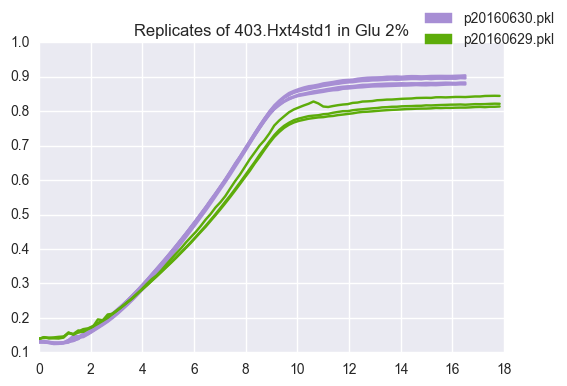

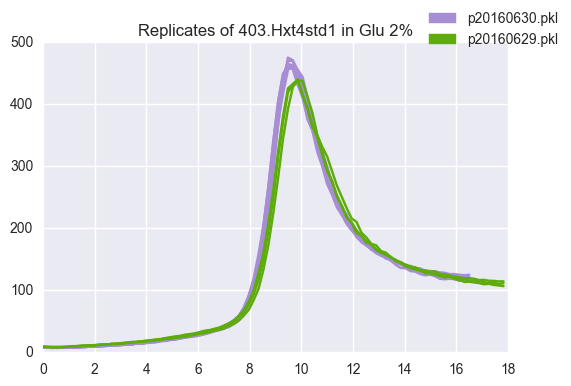

In [12]:
exptColors=xpr.plotRawReplicates(media,strain, dtype='OD')
plt.figure()
xpr.plotRawReplicates(media,strain, dtype='GFP', exptColors=exptColors)


It seems as though there is some (though tolerable) biological replicate variation even thought these technical replicates are near-impecable. If we realize that there are super dodgy experiments, we could go back and ignore them from the accesspr structure.

## Checking processing status
We check whether the experiments have been processed: a) the growth curves have been fitted and b) the Fluorescence has been corrected. having experiments whose processing may be incomplete might interfere with certain analyses. 

We are particularly interested in knowing, besides the basics, whether the fluorescence time derivative has been calculated. we interrogate about this too.

### Ever-more statistics!

You can add and update the process of as many statistics as you want, and these checks will be recorded as long as one experiment contains the statistic.


In [13]:
xpr.containsstat('d/dtFLperod')#now  checking for the flperod derivative
xpr.statContents
xpr.containsstat('Time centered at gr peak')#now  checking for the flperod derivative
xpr.statContents

,FLperod,gr,GFP,c-GFPperod,Time centered at gr peak
p20160702.pkl,NaN,1,1.0,1.0,0.75
p20160701.pkl,NaN,1,1.0,1.0,0.75
p20160704.pkl,NaN,1,1.0,1.0,0.75
p20160630.pkl,NaN,1,1.0,1.0,0.75
p20160703.pkl,NaN,1,1.0,1.0,0.75
p20160629.pkl,NaN,1,1.0,1.0,0.75


It looks like all experiments have the growth rate calculated, and that 3/4ths of the strains have the FLperod also calculated. I suspect the missing one is the untagged strain, for which the FLperod is not calculated. For now we won't bother too much about it.



# Plotting time-series information

## Combining replicates from different experiments

The challenge of combining replicates from different experiments, besides the obvious fact that= matching replicates are disperesed within the dataset, is:

* **sampling times for the same time series vary.** one experiment may have been measured at 3 hours, whereas another one may have been measured at 3.2. Even though the times are similar, collapsing them together just like that would be not only wrong – we would lose important information about the timing of events.  

* **lag time variability of cell growth**. As we are studying cells from stationary phase, release from the lag could vary each time.

The function xpr.plotReplicateMean solves these two problems by: 
* aligns all experiments by so that the time of the max growth rate is 0
* making sure all experiments have the same sampling times using interpolation 







processing Glu 2%
processing Glu 2%
processing Glu 2%
aligning experiment  p20160702.pkl
aligning experiment  p20160701.pkl
aligning experiment  p20160704.pkl
aligning experiment  p20160630.pkl
aligning experiment  p20160703.pkl
aligning experiment  p20160629.pkl
Experiments aligned successfully.
GFP cannot be interpolated as single dimension. attempting column-averaging...


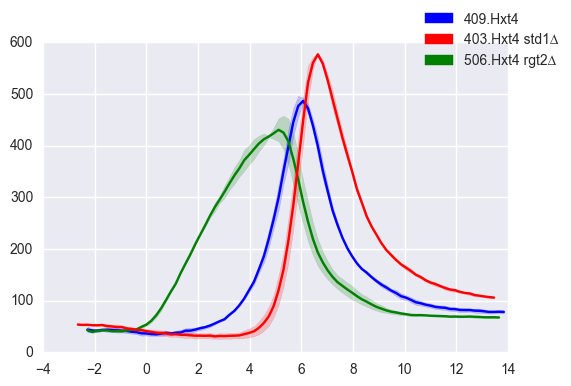

In [14]:
media='Glu 2%'
strain='409.Hxt4'
hxt4col='blue'
rgt2col='green'
std1col='red'
xpr.plotReplicateMean(media, '409.Hxt4',dtype='c-GFPperod', col='blue')
xpr.plotReplicateMean(media, '506.Hxt4rgt2',dtype='c-GFPperod', col='green')
xpr.plotReplicateMean(media, '403.Hxt4std1',dtype='c-GFPperod', col='red')
#plt.ylabel('FLperod')
#adding legend
patches= [pch.Patch(color=hxt4col),pch.Patch(color=std1col),pch.Patch(color=rgt2col)]
legends=['409.Hxt4', '403.Hxt4 std1∆', '506.Hxt4 rgt2∆']
plt.figlegend(patches, legends, 'upper right')
xpr.alignAll(rerun=True)
interpolated= xpr.interpTimes(media, '403.Hxt4std1', dtype='GFP')
#xpr.containssetup(media, '403.Hxt4std1')


We can also do the same plot for multiple media (one strain).

processing Glu 0.2%
processing Glu 0.4%
processing Glu 0.6%
processing Glu 0.8%
processing Glu 1%
processing Glu 1.5%
processing Glu 2%


'red'

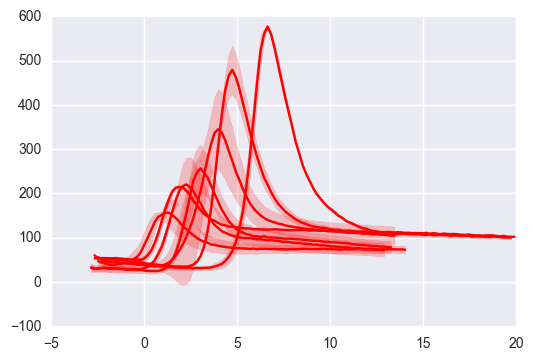

In [15]:
xpr.plotReplicateMean(media=['Glu 0.2%','Glu 0.4%','Glu 0.6%','Glu 0.8%','Glu 1%','Glu 1.5%','Glu 2%'],strain='403.Hxt4std1',dtype='c-GFPperod', col='red')

## Comparing values at specific timepoints

Perhaps what is interesting is not the full time series, but specific values of our replicates at specific timepoints of it (for example, the max growth rate time, or exactlu 4.5 hours after induction. 

To this aim, we will use the functions timeStat, timeStatAligned and timeStatAll. 

For specific media and strain,

* xpr.timeStat(media, strain, times=[4], includeMediaStrain=True) retrieves a time-dependent statistic at specific time points (hrs) from the start of the experiment. 
* xpr.timeStatAligned(media, strain, times=[0], includeMediaStrain=True) retrieves a time-dependent statistic at specific time points (hrs) relative to the time of max growth rate of a specific strain.
* xpr.timeStatAll(times, aligned=False, includeMediaStrain=True)  retrieves a time-dependent statistic at specific time points. aligned determintes wherhet the times are absolute or relative to the max growth rate of the experiment.

The functions return a **dataframe** with the columns **experiment, media, strain**, and a column for each time.  

In [16]:
xpr.timeStat('Glu 2%', '409.Hxt4', times=[0,2,4,6], dtype='c-GFPperod')

,experiment,media,strain,0,2,4,6
0,p20160630.pkl,Glu 2%,409.Hxt4,46.051,35.4469,36.7319,85.6388
1,p20160629.pkl,Glu 2%,409.Hxt4,49.7787,42.0434,47.4734,101.487


In [17]:
xpr.timeStatAligned('Glu 2%', '409.Hxt4', times=[-1,0,1], dtype='GFPmn') ##retrieving 1 hr before and after max growth rate time

,experiment,media,strain,-1,0,1
0,p20160630.pkl,Glu 2%,409.Hxt4,7.53079,10.2835,15.4119
1,p20160629.pkl,Glu 2%,409.Hxt4,9.36753,13.0224,19.0661


In [18]:
timedf=xpr.timeStatAll(times=[0,2,4,6,8,10], aligned=False)
timedf

,experiment,media,strain,0,2,4,6,8,10
0,p20160702.pkl,Glu 1.5%,506.Hxt4rgt2,0.156683,0.192103,0.349784,0.614147,0.744615,0.754197
1,p20160701.pkl,Glu 1.5%,506.Hxt4rgt2,0.137784,0.170017,0.329092,0.597406,0.833907,0.849077
2,p20160702.pkl,Glu 1.5%,229.WT,0.189282,0.242803,0.431368,0.731593,0.823688,0.830212
3,p20160701.pkl,Glu 1.5%,229.WT,0.138743,0.213373,0.397141,0.654525,0.763221,0.772037
4,p20160702.pkl,Glu 1.5%,409.Hxt4,0.141977,0.178669,0.332611,0.588746,0.831447,0.848138
5,p20160701.pkl,Glu 1.5%,409.Hxt4,0.139688,0.172115,0.312521,0.534362,0.80662,0.872089
6,p20160702.pkl,Glu 1.5%,403.Hxt4std1,0.14951,0.191519,0.354333,0.619871,0.83018,0.84656
7,p20160701.pkl,Glu 1.5%,403.Hxt4std1,0.172315,0.213302,0.370556,0.617864,0.816848,0.836195
8,p20160702.pkl,Glu 0.4%,506.Hxt4rgt2,0.161151,0.199575,0.304137,0.328562,0.339079,0.347788
9,p20160701.pkl,Glu 0.4%,506.Hxt4rgt2,0.145215,0.182573,0.329843,0.38513,0.397978,0.406276


Then we can transform the dataframe so that the time columns are reorganized into one variable column. this will allow us to do fancy plots.

In [19]:
## putting all the time values as a single value variable 'time'. This removes the individual time columns and creates a
##an extra row per condition per time. then we can plot by time as a category.
tidydf=pd.melt(timedf, id_vars=['media', 'strain'], value_vars=[0,2,4,6,8,10], var_name='time', value_name='c-GFPperod')
tidydf

,media,strain,time,c-GFPperod
0,Glu 1.5%,506.Hxt4rgt2,0,0.156683
1,Glu 1.5%,506.Hxt4rgt2,0,0.137784
2,Glu 1.5%,229.WT,0,0.189282
3,Glu 1.5%,229.WT,0,0.138743
4,Glu 1.5%,409.Hxt4,0,0.141977
5,Glu 1.5%,409.Hxt4,0,0.139688
6,Glu 1.5%,403.Hxt4std1,0,0.14951
7,Glu 1.5%,403.Hxt4std1,0,0.172315
8,Glu 0.4%,506.Hxt4rgt2,0,0.161151
9,Glu 0.4%,506.Hxt4rgt2,0,0.145215


## Working on a subsection of a dataframe
Sometimes we have too many strains or too many conditions. In this particular case we have too many media.

We want to work with  only 3 representative media. To do this, we type:
    

In [20]:
##For simplicity we will work with 3 media only
tidydf=ac.DFsubset(tidydf, 'media', ['Glu 0.4%', 'Glu 1%', 'Glu 2%'])
tidydf

,media,strain,time,c-GFPperod
8,Glu 0.4%,506.Hxt4rgt2,0,0.161151
9,Glu 0.4%,506.Hxt4rgt2,0,0.145215
10,Glu 0.4%,229.WT,0,0.194976
11,Glu 0.4%,229.WT,0,0.144191
12,Glu 0.4%,409.Hxt4,0,0.157832
13,Glu 0.4%,409.Hxt4,0,0.14839
14,Glu 0.4%,403.Hxt4std1,0,0.14977
15,Glu 0.4%,403.Hxt4std1,0,0.179868
80,Glu 0.4%,506.Hxt4rgt2,2,0.199575
81,Glu 0.4%,506.Hxt4rgt2,2,0.182573


### Response dynamics of Hxt4-yEGFP at different concentrations


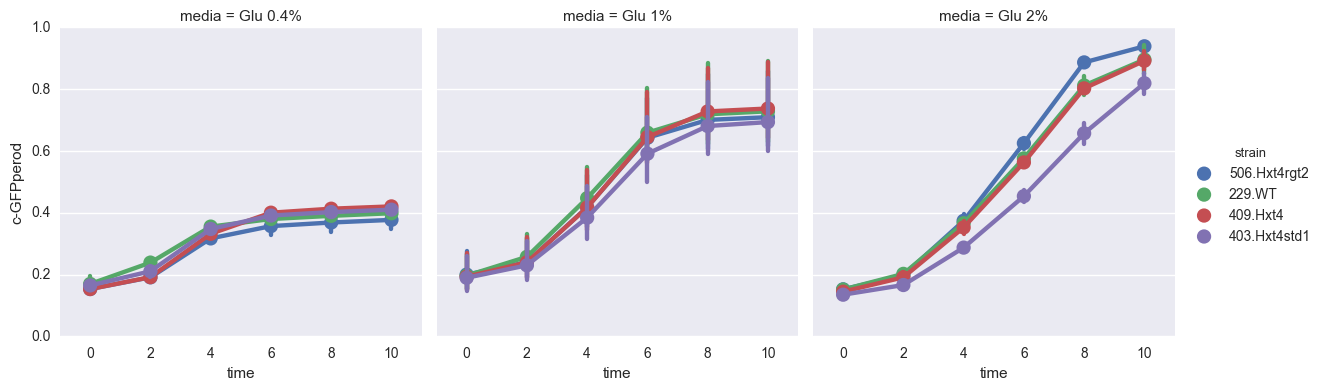

In [21]:

sns.factorplot(x='time', y='c-GFPperod',hue= 'strain', col='media', data=tidydf)



### Glucose response curve of Hxt4-yEGFP at different times

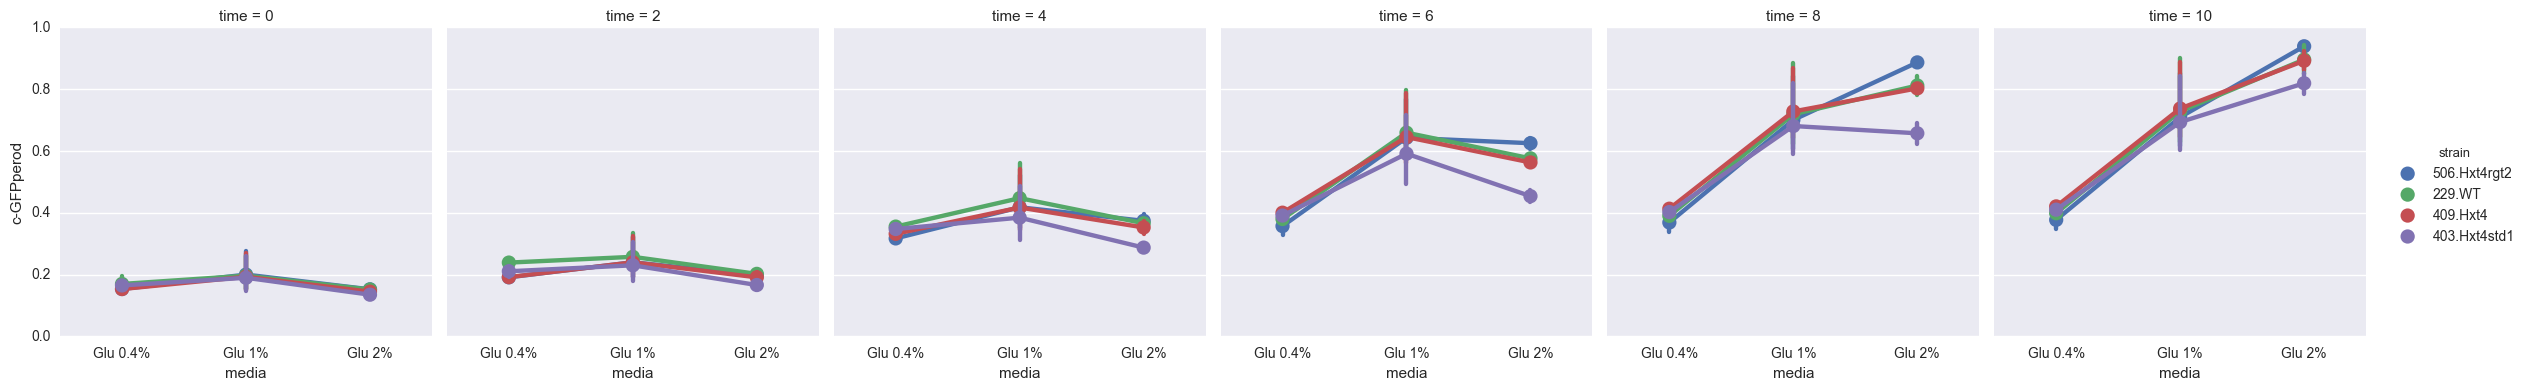

In [22]:
sns.factorplot(x='media', y='c-GFPperod',hue= 'strain', col='time', data=tidydf)


conclusion: the glucose dependency of Hxt4 depends heavily on time.



## Scatter plot coloured by a third variable

Often what we want to do is to generate a 2d scatterplot and color the dots by another variable. the function colorScatter does this for any 3 variables stored in time series. 

First we plot growth reate over time, coloring by the gene fluorescence



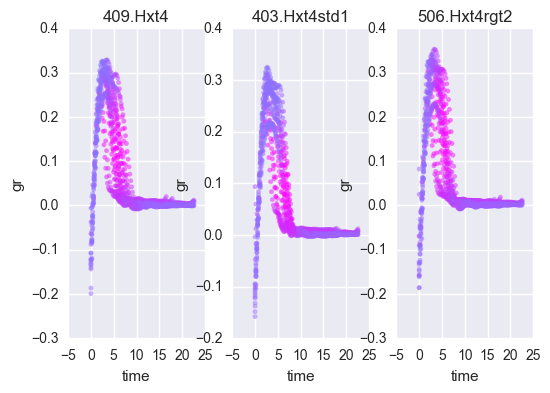

In [24]:
alpha=0.5
plt.subplot(131)
xstat='time'
ystat='gr'
stat='c-GFPperod'
strain='409.Hxt4'
xpr.colorScatter('Glu 0.2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap='cool', nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.4%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap='cool', nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.6%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap='cool', nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.8%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap='cool', nbins=100, alpha=alpha)
xpr.colorScatter('Glu 1%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap='cool',nbins=100, alpha=alpha)
xpr.colorScatter('Glu 1.5%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap='cool',nbins=100, alpha=alpha)
plt.title(strain)
plt.subplot(132)
strain='403.Hxt4std1'
xpr.colorScatter('Glu 0.2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap='cool', nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.4%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap='cool', nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.6%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap='cool', nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.8%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap='cool', nbins=100, alpha=alpha)
xpr.colorScatter('Glu 1%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap='cool',nbins=100, alpha=alpha)
xpr.colorScatter('Glu 1.5%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap='cool',nbins=100, alpha=alpha)
plt.title(strain)
plt.subplot(133)
strain='506.Hxt4rgt2'
xpr.colorScatter('Glu 0.2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap='cool', nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.4%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap='cool', nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.6%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap='cool', nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.8%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap='cool', nbins=100, alpha=alpha)
xpr.colorScatter('Glu 1%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap='cool',nbins=100, alpha=alpha)
xpr.colorScatter('Glu 1.5%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap='cool',nbins=100, alpha=alpha)
plt.title(strain)


In [ ]:
alpha=0.5
plt.subplot(131)
xstat='ODmn'
ystat='c-GFPperod'
stat='time'
strain='409.Hxt4'
cmap='viridis'
xpr.colorScatter('Glu 0.2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, symmetric=False,alpha=alpha)
xpr.colorScatter('Glu 0.4%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, symmetric=False,alpha=alpha)
xpr.colorScatter('Glu 0.6%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, symmetric=False,alpha=alpha)
xpr.colorScatter('Glu 0.8%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100,symmetric=False, alpha=alpha)
xpr.colorScatter('Glu 1%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap=cmap,nbins=100,symmetric=False, alpha=alpha)
xpr.colorScatter('Glu 1.5%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap=cmap,nbins=100, symmetric=False,alpha=alpha)
plt.title(strain)
plt.subplot(132)
strain='403.Hxt4std1'
xpr.colorScatter('Glu 0.2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.4%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.6%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.8%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha)
xpr.colorScatter('Glu 1%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap=cmap,nbins=100, alpha=alpha)
xpr.colorScatter('Glu 1.5%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap=cmap,nbins=100, alpha=alpha)
plt.title(strain)
plt.subplot(133)
strain='506.Hxt4rgt2'
xpr.colorScatter('Glu 0.2%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.4%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.6%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha)
xpr.colorScatter('Glu 0.8%', strain,xstat=xstat,ystat=ystat,colorBy=stat,cmap=cmap, nbins=100, alpha=alpha)
xpr.colorScatter('Glu 1%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap=cmap,nbins=100, alpha=alpha)
xpr.colorScatter('Glu 1.5%', strain,xstat=xstat,ystat=ystat,colorBy=stat, cmap=cmap,nbins=100, alpha=alpha, addLegend=True)
plt.title(strain)


It looks like Hxt4 expression is always allocated to the 'drop in growth' regime.

# Analysis of point statistics through dataframes and seaborn 


## Extracting single-point statistics of all experiments

We are usually interested in one point-statistics about our strains. We will extract a lot of useful statistics and put them into a very nice pandas dataframe, which we will use for analysis. we want to exclude the media conditions, which are irrelevant and provide a lot of missing values. 





In [25]:
hxt4df=xpr.extractAllInfo(excludeNull=True)
hxt4df

extracting 506.Hxt4rgt2 in Glu 1.5%
extracting 229.WT in Glu 1.5%
extracting 409.Hxt4 in Glu 1.5%
extracting 403.Hxt4std1 in Glu 1.5%
extracting 506.Hxt4rgt2 in Glu 0.4%
extracting 229.WT in Glu 0.4%
extracting 409.Hxt4 in Glu 0.4%
extracting 403.Hxt4std1 in Glu 0.4%
extracting 506.Hxt4rgt2 in Glu 1%
extracting 229.WT in Glu 1%
extracting 409.Hxt4 in Glu 1%
extracting 403.Hxt4std1 in Glu 1%
extracting 506.Hxt4rgt2 in Glu 0.8%
extracting 229.WT in Glu 0.8%
extracting 409.Hxt4 in Glu 0.8%
extracting 403.Hxt4std1 in Glu 0.8%
extracting 506.Hxt4rgt2 in Glu 0.6%
extracting 229.WT in Glu 0.6%
extracting 409.Hxt4 in Glu 0.6%
extracting 403.Hxt4std1 in Glu 0.6%
extracting 506.Hxt4rgt2 in Glu 0.2%
extracting 229.WT in Glu 0.2%
extracting 409.Hxt4 in Glu 0.2%
extracting 403.Hxt4std1 in Glu 0.2%
extracting 506.Hxt4rgt2 in Glu 2%
extracting 229.WT in Glu 2%
extracting 409.Hxt4 in Glu 2%
extracting 403.Hxt4std1 in Glu 2%


,experiment,media,strain,InitialOD,FinalOD,InitialRawFL,InitialFLperOD,FinalFLperOD,FLPeak,FLAbsPeakTime,...,realTime,alignedTime,FLperODTS,maxGR,maxGRvar,maxGRTime,FLperodAUC,grAUC,halfFLAreaTime,halfGRAreaTime
0,p20160702.pkl,Glu 1.5%,506.Hxt4rgt2,0.156683,0.778573,6.256688,36.729555,67.968868,298.460704,6.258056,...,0. 0.18980556 0.37941667 0.569...,-3.60319444 -3.41338889 -3.22377778 -3.034...,36.7295551 32.81689794 32.74806861 31...,0.308840,0.000033,3.548210,11712.911233,8.399583,4.740833,0.568917
1,p20160701.pkl,Glu 1.5%,506.Hxt4rgt2,0.137784,0.858681,7.004737,48.299689,52.223560,263.458542,6.827528,...,0. 0.18980556 0.37944444 0.569...,-2.84488889 -2.65508333 -2.46544444 -2.275...,48.29968889 40.06136967 40.53953976 39...,0.340671,0.000020,2.795583,10033.954023,9.555580,5.120528,1.517194
2,p20160702.pkl,Glu 1.5%,229.WT,0.189282,0.844276,1.162403,0.500193,-0.147365,1.346103,5.120250,...,0. 0.18980556 0.37941667 0.569...,-2.27577778 -2.08597222 -1.89636111 -1.706...,0.5001926 0.30548124 -0.91302594 0.0881642...,0.297378,0.000016,2.414216,-2.761329,7.869999,12.515806,1.706694
3,p20160701.pkl,Glu 1.5%,229.WT,0.138743,0.778350,0.873308,-0.760223,-0.163903,2.946602,1.517333,...,0. 0.18980556 0.37944444 0.569...,-2.84488889 -2.65508333 -2.46544444 -2.275...,-7.60222767e-01 -4.53010564e-01 -6.51416844...,0.330983,0.000023,2.924537,1.724711,9.254868,16.120167,0.568944
4,p20160702.pkl,Glu 1.5%,409.Hxt4,0.141977,0.857194,5.803831,39.951683,70.650189,398.906470,7.206222,...,0. 0.18980556 0.37941667 0.569...,-2.65502778 -2.46522222 -2.27561111 -2.085...,39.95168322 30.95547416 32.70819329 33...,0.324278,0.000011,2.732780,12700.103323,9.447796,6.068278,1.706722
5,p20160701.pkl,Glu 1.5%,409.Hxt4,0.139688,0.876485,6.090451,39.874019,61.274399,394.893741,7.775778,...,0. 0.18980556 0.37944444 0.569...,-2.84488889 -2.65508333 -2.46544444 -2.275...,39.87401898 35.91980653 36.61889747 35...,0.308608,0.000047,2.909368,12632.662866,9.685217,6.068778,1.706833
6,p20160702.pkl,Glu 1.5%,403.Hxt4std1,0.149510,0.855086,8.759545,57.858022,95.726305,423.893636,7.395861,...,0. 0.18980556 0.37941667 0.569...,-2.65502778 -2.46522222 -2.27561111 -2.085...,57.85802191 48.83968763 49.69093623 50...,0.324896,0.000007,2.658821,14409.365230,9.145740,7.395722,1.517083
7,p20160701.pkl,Glu 1.5%,403.Hxt4std1,0.172315,0.841907,10.849022,62.221657,104.045671,534.118278,7.396472,...,0. 0.18980556 0.37944444 0.569...,-2.65525 -2.46544444 -2.27580556 -2.086...,62.2216566 58.112017 56.02124274 57...,0.284896,0.000014,2.698866,16530.372910,8.336005,7.206667,1.706833
8,p20160702.pkl,Glu 0.4%,506.Hxt4rgt2,0.161151,0.388853,5.952884,35.797511,44.662626,104.483491,3.413556,...,0. 0.18980556 0.37941667 0.569...,-2.27577778 -2.08597222 -1.89636111 -1.706...,35.79751125 30.32003592 28.52501371 28...,0.274450,0.000015,2.277674,6425.473167,4.592826,8.154222,0.758528
9,p20160701.pkl,Glu 0.4%,506.Hxt4rgt2,0.145215,0.440936,6.820119,44.662683,52.493249,124.856339,3.982778,...,0. 0.18980556 0.37944444 0.569...,-2.65525 -2.46544444 -2.27580556 -2.086...,44.66268277 38.10409991 37.16410839 38...,0.331303,0.000008,2.655250,7583.182436,5.790922,7.775611,0.568944


We can see that hxt4df contains the stats for each condition in each experiment.

* Note: extractAllInfo() also extracts time series in the form of a string in the variables ending with description ending in 'TS'.

## Using seaborn to easily plot single point statistics

The seaborn plotting library is very helpful in plotting data contained in a dataframe, particularly because it allows to seamlessly create comparative plots of data subgroups. it is related to R's ggplot2 though not quite the same. 


First, we want to obtain a classic monod curve that explains how the max growth rate is determined by the amount of available nutrient. 

We show how the final OD is a proxy for the amount of glucose in the medium, and build upon that.



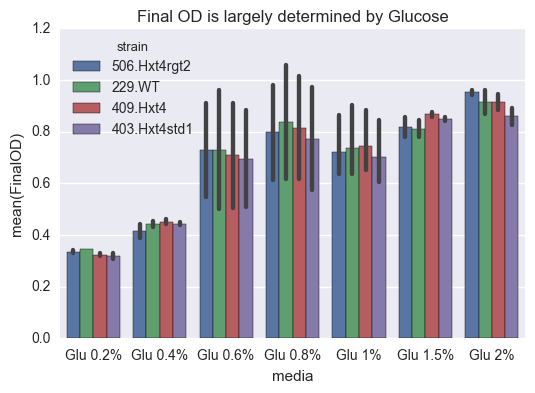

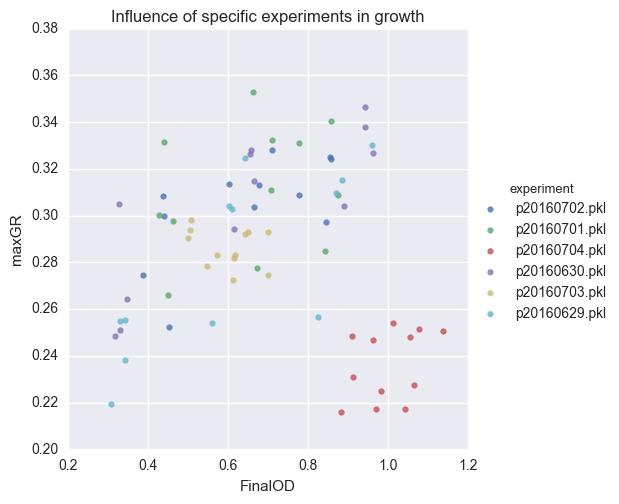

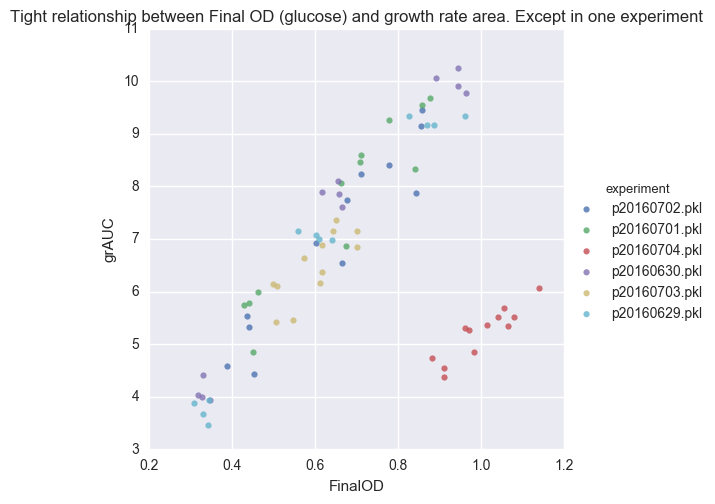

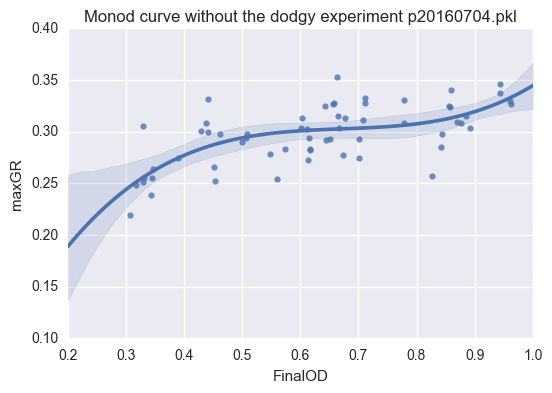

In [82]:

sns.barplot('media','FinalOD', order= ['Glu 0.2%','Glu 0.4%','Glu 0.6%','Glu 0.8%','Glu 1%','Glu 1.5%','Glu 2%'], hue='strain', data=hxt4df)
plt.title('Final OD is largely determined by Glucose')
sns.lmplot('FinalOD','maxGR', hue='experiment', data=hxt4df, fit_reg=False)
plt.title('Influence of specific experiments in growth')
sns.lmplot('FinalOD','grAUC', hue='experiment', data=hxt4df, fit_reg=False)
plt.title('Tight relationship between Final OD (glucose) and growth rate area. Except in one experiment')
###monod curve excluding weird experiment
plt.figure()
hxt4df=ac.DFsubset(hxt4df, 'experiment', ['p20160629.pkl', 'p20160630.pkl', 'p20160701.pkl', 'p20160702.pkl','p20160703.pkl'])
sns.regplot('FinalOD','maxGR', data=hxt4df, order=3)
plt.title('Monod curve without the dodgy experiment p20160704.pkl')
##same plot without fittig the regression


The results above show that one of the experiments included shows a dodgy behabiour with regard to the others. This opens the possibility to consider it an outlier.

## Bar plots to compare statistics between media and strains

Naturally, we want to compare the expression obtained for all strains in all media. Normally ths would require plenty of code to organize the data and then format a plot. 

With seaborn, we do one-liners:

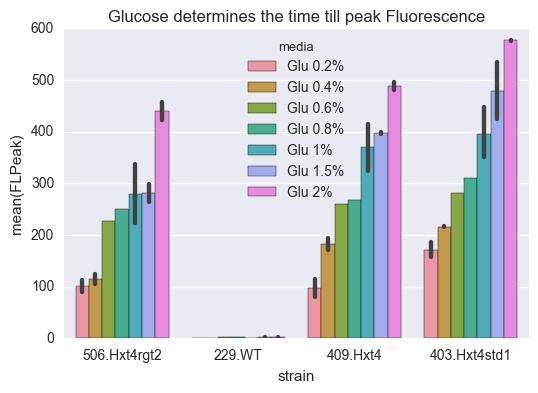

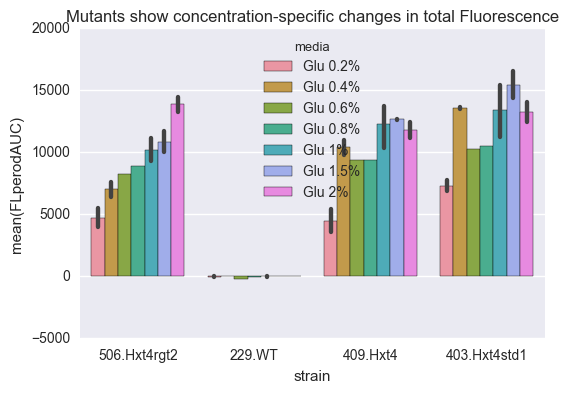

In [83]:
sns.barplot('strain', 'FLPeak', data=hxt4df, hue='media', hue_order= ['Glu 0.2%','Glu 0.4%','Glu 0.6%','Glu 0.8%','Glu 1%','Glu 1.5%','Glu 2%'])
plt.title('Glucose determines the time till peak Fluorescence')
plt.figure()
sns.barplot('strain', 'FLperodAUC', data=hxt4df, hue='media', hue_order= ['Glu 0.2%','Glu 0.4%','Glu 0.6%','Glu 0.8%','Glu 1%','Glu 1.5%','Glu 2%'])
plt.title('Mutants show concentration-specific changes in total Fluorescence')

## Linear models between variables 

### (Glucose vs FL Peak time)
We would like to know if the fluorescence peak time changes with glucose (proxied here by FinalOD) 
and with different genetic backgrounds.

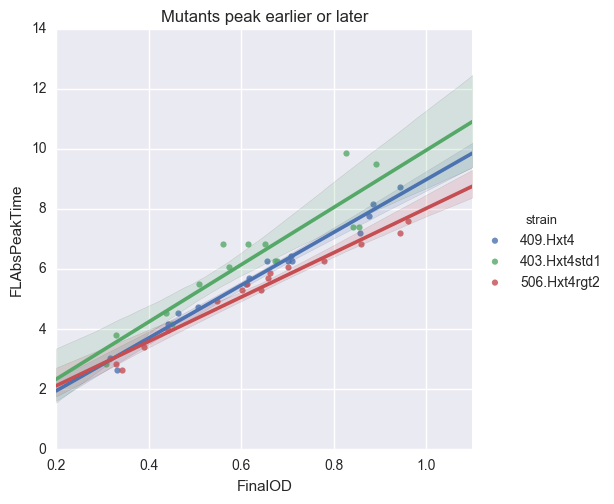

In [84]:
sns.lmplot('FinalOD', 'FLAbsPeakTime', hue='strain',data=ac.DFsubset(hxt4df, 'strain', ['409.Hxt4', '403.Hxt4std1','506.Hxt4rgt2']))
plt.title('Mutants peak earlier or later')

# More fancy accesspr features coming soon...


In [ ]:
##debug code for interpTimes.

def fitsBounds(x, bounds):
    if x> bounds[0] and x< bounds[1]:
        return True
    else:
        return False
ignoreExps=False
dtype='GFP'
media='Glu 2%'
strain='403.Hxt4std1'
xpr.containssetup(media, strain, strict=True, musthave=dtype)
experimentList=xpr.containslist
interpRange=[]
maxLengths=[]
startPoints=[]
adjustedTimes=dict()
for expt in experimentList: ###retireving the limiting values for interpolation amongst all experiments.
	if ignoreExps != False and expt in ignoreExps:
		continue
for expt in experimentList: ###retireving the limiting values for interpolation amongst all experiments.
	if ignoreExps != False and expt in ignoreExps:
		continue
	adjustedTimes[expt]=dict()
	maxLengths.append(np.around(xpr.data[expt].d[media][strain]['Time centered at gr peak'][-1],2))
	startPoints.append(np.around(xpr.data[expt].d[media][strain]['Time centered at gr peak'][0],2))


    
interpRange=[np.max(np.array(startPoints)), np.min(np.array(maxLengths))]
interpRange
func= lambda x: fitsBounds(x, interpRange) ### this lambda creates function func which will evaluate whether x falls within the interpRange
for expt in experimentList:
	fitPoints=np.where([func(x) for x in xpr.data[expt].d[media][strain]['Time centered at gr peak']])
	#print('fitpoints of '+expt+': ', fitPoints) 
	adjustedTimes[expt]['time']=np.around(xpr.data[expt].d[media][strain]['Time centered at gr peak'][fitPoints],2)
	adjustedTimes[expt][dtype]= xpr.data[expt].d[media][strain][dtype][fitPoints]
	#print('adjustedTimes of '+expt+': ', adjustedTimes[expt]['time']) 
	#print(np.column_stack([adjustedTimes[expt]['time'],adjustedTimes[expt][dtype]]))
adjustedTimes
finalDict={};
finalDict['experiments']=experimentList
finalDict[dtype]=np.empty([np.size(adjustedTimes[experimentList[0]]['time']), np.size(experimentList)], dtype=None)
print(np.shape(finalDict[dtype]))
print(np.shape(adjustedTimes[experimentList[0]]['time']))

for j in range(0, np.size(experimentList)):
    #arbitrarily taking the first experiment in the list as reference
    fint=scint.interp1d(np.around(adjustedTimes[experimentList[j]]['time'],2),adjustedTimes[experimentList[j]][dtype]) 
    finalDict['time']=np.around(adjustedTimes[experimentList[0]]['time'],2)
print(np.shape(finalDict['time']))
#finalDict[dtype][:, j]=fint(np.around(adjustedTimes[experimentList[0]]['time'],2))
